# Bank Renege

In [344]:
!pip install simpy
import random
import simpy
import pandas as pd
import matplotlib.pyplot as plt

NUEVOS_CLIENTES = 15  # Número total de clientes
INTERVALO_CLIENTES = 10  # Generar nuevos clientes aproximadamente cada x segundos
PACIENCIA_MINIMA = 4  # Paciencia mínima del cliente
PACIENCIA_MAXIMA = 6  # Paciencia máxima del cliente

# Variables para almacenar los tiempos de llegada, tiempos de espera y tiempos de servicio de los clientes
tiempos_llegada = []
tiempos_espera = []
tiempos_servicio = []*
t = []
abandonaron = 0
se_mantienen = 0

In [345]:
def fuente(env, numero, intervalo, contador):
    """Fuente genera clientes de forma aleatoria"""
    for i in range(numero):
        c = cliente(env, 'Cliente%1d' % (i+1), contador, tiempo_en_banco=12.0)
        env.process(c)
        t = random.expovariate(1.0 / intervalo)
        yield env.timeout(t)

In [346]:
def cliente(env, nombre, contador, tiempo_en_banco):
    """El cliente llega, es atendido y se va."""
    llegada = env.now
    tiempos_llegada.append(llegada)
    print('%7.4f %s: Aquí estoy' % (llegada, nombre))

    with contador.request() as req:
        paciencia = random.uniform(PACIENCIA_MINIMA, PACIENCIA_MAXIMA)
        resultados = yield req | env.timeout(paciencia)

        espera = env.now - llegada
        t_atender = env.now
        t.append(t_atender)

        if req in resultados:
            print('%7.4f %s: Esperé %6.3f' % (env.now, nombre, espera))
            tiempos_espera.append(espera)
            global se_mantienen
            se_mantienen += 1

            tib = random.expovariate(1.0 / tiempo_en_banco)
            yield env.timeout(tib)
            print('%7.4f %s: Terminé' % (env.now, nombre))
            tib = env.now - llegada
            tiempos_servicio.append(tib)
        else:
            print('%7.4f %s: ABANDONÉ después de %6.3f' % (env.now, nombre, espera))
            tiempos_espera.append(espera)
            global abandonaron
            abandonaron += 1
            tib = [None]
            tiempos_servicio.append(tib)

In [347]:
# Configuración y ejecución de la simulación
env = simpy.Environment()

contador = simpy.Resource(env, capacity=1)
env.process(fuente(env, NUEVOS_CLIENTES, INTERVALO_CLIENTES, contador))
env.run()

# Crear la tabla de tiempos de llegada, tiempos de espera y tiempos de servicio
tabla = pd.DataFrame({
    'Número de Cliente': ['Cliente %01d' % i for i in range(1, NUEVOS_CLIENTES+1)],
    'Tiempo de Llegada': tiempos_llegada,
    'Tiempo de Espera': tiempos_espera,
    'Tiempo de Servicio': [tiempos_servicio[i] for i in range(NUEVOS_CLIENTES)]*
})
tabla1 = tabla.set_index('Número de Cliente')

# Mostrar la tabla
print('\nTabla de Tiempos\n')
print(tabla1)

 0.0000 Cliente1: Aquí estoy
 0.0000 Cliente1: Esperé  0.000
 7.6977 Cliente2: Aquí estoy
 8.0092 Cliente1: Terminé
 8.0092 Cliente2: Esperé  0.312
20.6687 Cliente3: Aquí estoy
21.1888 Cliente2: Terminé
21.1888 Cliente3: Esperé  0.520
29.7684 Cliente4: Aquí estoy
31.0162 Cliente5: Aquí estoy
31.8354 Cliente6: Aquí estoy
33.9722 Cliente4: ABANDONÉ después de  4.204
34.3942 Cliente3: Terminé
34.3942 Cliente5: Esperé  3.378
34.9424 Cliente5: Terminé
34.9424 Cliente6: Esperé  3.107
38.7832 Cliente7: Aquí estoy
43.2587 Cliente7: ABANDONÉ después de  4.476
43.2919 Cliente8: Aquí estoy
47.3519 Cliente8: ABANDONÉ después de  4.060
47.5471 Cliente6: Terminé
61.1688 Cliente9: Aquí estoy
61.1688 Cliente9: Esperé  0.000
64.0012 Cliente10: Aquí estoy
64.4763 Cliente9: Terminé
64.4763 Cliente10: Esperé  0.475
66.6455 Cliente10: Terminé
69.0708 Cliente11: Aquí estoy
69.0708 Cliente11: Esperé  0.000
70.1660 Cliente12: Aquí estoy
75.6676 Cliente12: ABANDONÉ después de  5.502
83.0986 Cliente13: Aquí est

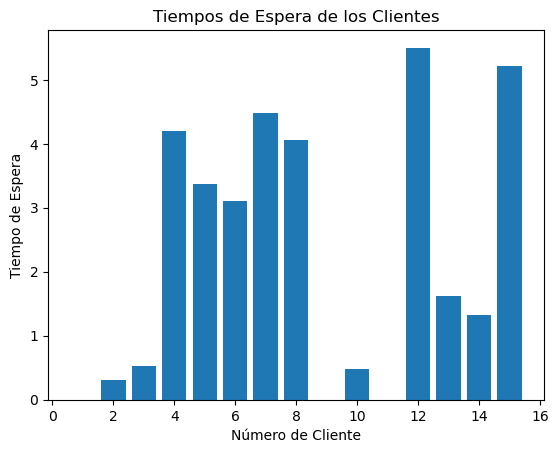

Personas que abandonaron: 5
Personas que se quedaron: 10
Tiempo medio de espera:  2.278577976350603


In [348]:
import numpy as np
# Crear la gráfica de barras de los tiempos de espera
plt.bar(np.arange(1, len(tiempos_espera)+1), tiempos_espera)
plt.xlabel('Número de Cliente')
plt.ylabel('Tiempo de Espera')
plt.title('Tiempos de Espera de los Clientes')
plt.show()

print("Personas que abandonaron:", abandonaron)
print("Personas que se quedaron:", se_mantienen)
t_medio_espera=np.mean(tiempos_espera)
print("Tiempo medio de espera: ", t_medio_espera)

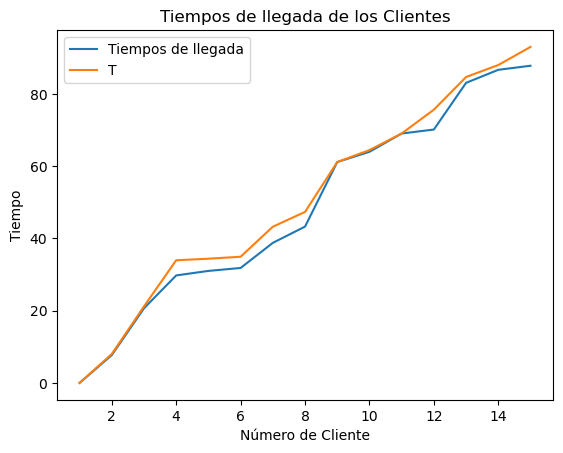

In [353]:
# Crear la gráfica de barras de los tiempos de llegada
plt.plot(np.arange(1, len(tiempos_llegada) + 1), tiempos_llegada, label='Tiempos de llegada')
plt.plot(np.arange(1, len(tiempos_llegada) + 1), t, label='T')

# Agregar leyenda
plt.legend()

# Configurar etiquetas y título
plt.xlabel('Número de Cliente')
plt.ylabel('Tiempo')
plt.title('Tiempos de llegada de los Clientes')

# Mostrar la gráfica
plt.show()
